In [43]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
from scipy import stats
import ipywidgets as widgets
from IPython.display import display, clear_output

In [44]:
# Read weather data from NOAA
weather_all_stations_df = pd.read_csv("Resources/weather_datatype_separated.csv")

# Convert date to proper date time format.
# this will allow us to use date calculations
weather_all_stations_df['date'] = pd.to_datetime(weather_all_stations_df['date'])

# Separate out just the year
weather_all_stations_df['Year'] = weather_all_stations_df['date'].dt.year
print(weather_all_stations_df.count())
weather_all_stations_df.head()

date          201347
station       201347
attributes    201347
country       201347
DP10           22143
DP1X           22130
DT32           11896
DX70           17164
DX90           17152
EMNT           11866
EMXP           22089
EMXT           17137
HTDD            9941
MNPN              13
MXPN              13
PRCP           22202
TAVG           10487
TMAX           17114
Year          201347
dtype: int64


,date,station,attributes,country,DP10,DP1X,DT32,DX70,DX90,EMNT,EMXP,EMXT,HTDD,MNPN,MXPN,PRCP,TAVG,TMAX,Year
0,1996-01-01,GHCND:AEM00041218,S,AE,NaN,NaN,NaN,339.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
1,1996-01-01,GHCND:AEM00041218,S,AE,NaN,NaN,NaN,NaN,218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
2,1996-01-01,GHCND:AEM00041218,"S,0706,",AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.0,NaN,NaN,NaN,NaN,NaN,NaN,1996
3,1996-01-01,GHCND:AEM00041218,S,AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.7,1996
4,2004-01-01,GHCND:AEM00041194,S,AE,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [45]:
# Get the DX70 data

dx70_df = weather_all_stations_df[(weather_all_stations_df['DX70'].notna())]
dx70_average = dx70_df.groupby(['country', 'Year'])['DX70'].mean()
dx70_average

country  Year
AE       1996    339.0
         2006    335.0
         2007    330.0
         2008    335.5
         2009    332.5
                 ...  
WA       2006    348.0
         2008    353.0
         2012    347.0
         2017    337.0
         2022    344.5
Name: DX70, Length: 1831, dtype: float64

In [46]:
# Get the DX90 data

dx90_df = weather_all_stations_df[(weather_all_stations_df['DX90'].notna())]
dx90_average = dx90_df.groupby(['country', 'Year'])['DX90'].mean()
dx90_average

country  Year
AE       1996    218.0
         2006    231.0
         2007    183.0
         2008    228.5
         2009    210.0
                 ...  
WA       2006     50.0
         2008     69.0
         2012    109.0
         2017     91.0
         2022    107.5
Name: DX90, Length: 1831, dtype: float64

In [47]:
# Get the TMAX data

tmax_df = weather_all_stations_df[(weather_all_stations_df['TMAX'].notna())]
tmax_average = tmax_df.groupby(['country', 'Year'])['TMAX'].mean()
tmax_average.head()

country  Year
AE       1996    96.70
         2006    97.20
         2007    91.00
         2008    93.95
         2009    94.70
Name: TMAX, dtype: float64

In [48]:
# Get the TMAX data

tavg_df = weather_all_stations_df[(weather_all_stations_df['TAVG'].notna())]
tavg_average = tavg_df.groupby(['country', 'Year'])['TAVG'].mean()
tavg_average.head()

country  Year
AF       1995    47.8
         1996    49.3
         1997    53.7
         1998    51.1
         1999    50.6
Name: TAVG, dtype: float64

In [49]:
# Get the EMXT data

emxt_df = weather_all_stations_df[(weather_all_stations_df['EMXT'].notna())]
emxt_average = emxt_df.groupby(['country', 'Year'])['EMXT'].mean()
emxt_average

country  Year
AE       1996    119.0
         2006    118.0
         2007    110.0
         2008    117.0
         2009    120.5
                 ...  
WA       2006     99.0
         2008     97.0
         2012    105.0
         2017     96.0
         2022     98.5
Name: EMXT, Length: 1831, dtype: float64

In [50]:
# Get the EMNT data

emnt_df = weather_all_stations_df[(weather_all_stations_df['EMNT'].notna())]
emnt_average = emnt_df.groupby(['country', 'Year'])['EMNT'].mean()
emnt_average


country  Year
AF       1995   -10.000000
         1996    -7.000000
         1997    10.000000
         1998    -2.000000
         1999    12.000000
                   ...    
WA       2000    32.500000
         2001    29.500000
         2002    31.500000
         2003    34.333333
         2008    38.000000
Name: EMNT, Length: 1513, dtype: float64

In [51]:
# Get the PRCP data

prcp_df = weather_all_stations_df[(weather_all_stations_df['PRCP'].notna())]
prcp_average = prcp_df.groupby(['country', 'Year'])['PRCP'].mean()
prcp_average

country  Year
AE       2004     2.3100
         2006     4.0800
         2010     4.8300
         2011     1.0100
         2012     2.0600
                  ...   
WA       1999    10.3150
         2000    13.1000
         2001    11.0625
         2002     9.1550
         2003     6.6825
Name: PRCP, Length: 1687, dtype: float64

In [52]:
# Get the EMXP data

emxp_df = weather_all_stations_df[(weather_all_stations_df['EMXP'].notna())]
emxp_average = emxp_df.groupby(['country', 'Year'])['EMXP'].mean()
emxp_average

country  Year
AE       2004    0.9000
         2006    1.7700
         2010    3.1500
         2011    0.6300
         2012    1.6600
                  ...  
WA       1999    1.2200
         2000    1.8525
         2001    1.7800
         2002    1.4650
         2003    0.7575
Name: EMXP, Length: 1687, dtype: float64

In [53]:
# Combine all EMXT, EMNT, PRCP etc. into a single dataframe

weather_country_overall_df = pd.DataFrame({
    "DX70": dx70_average,
    "DX90": dx90_average,
    "TMAX": tmax_average,
    "TAVG": tavg_average,
    "EMXT": emxt_average,
    "EMNT": emnt_average,
    "PRCP": prcp_average,
    "EMXP": emxp_average,
}).reset_index()

weather_country_overall_df.head(50)

,country,Year,DX70,DX90,TMAX,TAVG,EMXT,EMNT,PRCP,EMXP
0,AE,1996,339.000000,218.000000,96.700000,NaN,119.000000,NaN,NaN,NaN
1,AE,2004,NaN,NaN,NaN,NaN,NaN,NaN,2.310000,0.900000
2,AE,2006,335.000000,231.000000,97.200000,NaN,118.000000,NaN,4.080000,1.770000
3,AE,2007,330.000000,183.000000,91.000000,NaN,110.000000,NaN,NaN,NaN
4,AE,2008,335.500000,228.500000,93.950000,NaN,117.000000,NaN,NaN,NaN
5,AE,2009,332.500000,210.000000,94.700000,NaN,120.500000,NaN,NaN,NaN
6,AE,2010,NaN,NaN,NaN,NaN,NaN,NaN,4.830000,3.150000
7,AE,2011,NaN,NaN,NaN,NaN,NaN,NaN,1.010000,0.630000
8,AE,2012,342.500000,225.000000,96.400000,NaN,120.000000,NaN,2.060000,1.660000
9,AE,2014,NaN,NaN,NaN,NaN,NaN,NaN,2.330000,0.620000


In [54]:
# Get the country codes according to FIPS-10 standard
# This is the cleaned CSV with Country names that match with Wine data
country_codes_df = pd.read_csv('Resources/fips-countries.csv')
country_codes_df.head()

,code,country
0,AF,Afghanistan
1,AL,Albania
2,AG,Algeria
3,AQ,American Samoa
4,AN,Andorra


In [55]:
# Get the wine data
wine_data_df = pd.read_csv('Resources/Wine_data_all_2.csv')
wine_data_df.head()

,Continent,country,Product,Variable,Year,Unit,Quantity
0,Asia,Afghanistan,Wine,Consumption,1995,1000 hl,0
1,Asia,Afghanistan,Wine,Imports,1995,1000 hl,0
2,Asia,Afghanistan,Wine,Production,1995,1000 hl,0
3,Asia,Afghanistan,Wine,Consumption,1996,1000 hl,0
4,Asia,Afghanistan,Wine,Imports,1996,1000 hl,0


In [56]:
# Merge the wine data with country codes to get a column with matching 2 letter FIPS-10 country code
# This will allow us to correlate the data with NOAA weather data processed above into weather_country_overall_df
wine_data_df = pd.merge(wine_data_df, country_codes_df, on='country')
wine_data_df.head()


,Continent,country,Product,Variable,Year,Unit,Quantity,code
0,Asia,Afghanistan,Wine,Consumption,1995,1000 hl,0,AF
1,Asia,Afghanistan,Wine,Imports,1995,1000 hl,0,AF
2,Asia,Afghanistan,Wine,Production,1995,1000 hl,0,AF
3,Asia,Afghanistan,Wine,Consumption,1996,1000 hl,0,AF
4,Asia,Afghanistan,Wine,Imports,1996,1000 hl,0,AF


In [57]:
# Filter only production data
wine_data_df = wine_data_df[wine_data_df['Variable'] == 'Production']

# Filter only wine data
wine_data_df = wine_data_df[wine_data_df['Product'] == 'Wine']

# Trim unnecessary 'Variable' column
wine_data_df = wine_data_df.drop(columns=['Variable'])

# Clean up the Quantity column to replace spaces and convert to numeric
wine_data_df['Quantity'] = wine_data_df['Quantity'].str.replace(' ', '')
wine_data_df['Quantity'] = pd.to_numeric(wine_data_df['Quantity'])

# Convert 1000 HL to Gallons
wine_data_df['Gallons'] = wine_data_df['Quantity'] * 26417.2

# Drop unnecessary columns
wine_data_df = wine_data_df.drop(columns=['Quantity'])
wine_data_df = wine_data_df.drop(columns=['country'])
wine_data_df = wine_data_df.drop(columns=['Continent'])
wine_data_df = wine_data_df.drop(columns=['Product'])
wine_data_df = wine_data_df.drop(columns=['Unit'])

# rename code to country, this will aid in merging with weather data
wine_data_df.rename(columns={'code': 'country'}, inplace=True)
wine_data_df.tail()

,Year,country,Gallons
21670,2018,ZI,528344.0
21674,2019,ZI,369840.8
21678,2020,ZI,369840.8
21682,2021,ZI,369840.8
21686,2022,ZI,369840.8


In [58]:
# Merge wine and weather data
weather_and_wine_df = pd.merge(wine_data_df, weather_country_overall_df, on=['country', 'Year'])
weather_and_wine_df.tail()

,Year,country,Gallons,DX70,DX90,TMAX,TAVG,EMXT,EMNT,PRCP,EMXP
2162,2018,VM,0.0,NaN,NaN,NaN,NaN,NaN,NaN,62.521429,4.828571
2163,2019,VM,0.0,NaN,NaN,NaN,NaN,NaN,NaN,56.551429,4.418571
2164,2020,VM,0.0,NaN,NaN,NaN,NaN,NaN,NaN,62.635714,5.124286
2165,2021,VM,0.0,NaN,NaN,NaN,NaN,NaN,NaN,72.560000,4.410000
2166,2022,VM,0.0,NaN,NaN,NaN,NaN,NaN,NaN,105.860000,4.720000


In [59]:
# Max temperature
# We only care about data that is not NaN
tmax_ww_df = weather_and_wine_df[weather_and_wine_df['TMAX'].notna()]

tmax_ww_df.head()

,Year,country,Gallons,DX70,DX90,TMAX,TAVG,EMXT,EMNT,PRCP,EMXP
0,1995,AF,0.0,151.0,28.0,59.6,47.8,97.0,-10.0,NaN,NaN
1,1996,AF,0.0,137.0,21.0,60.0,49.3,95.0,-7.0,NaN,NaN
2,1997,AF,0.0,169.0,43.0,64.7,53.7,101.0,10.0,NaN,NaN
3,1998,AF,0.0,151.0,23.0,61.6,51.1,100.0,-2.0,NaN,NaN
4,1999,AF,0.0,140.0,9.0,60.2,50.6,95.0,12.0,NaN,NaN


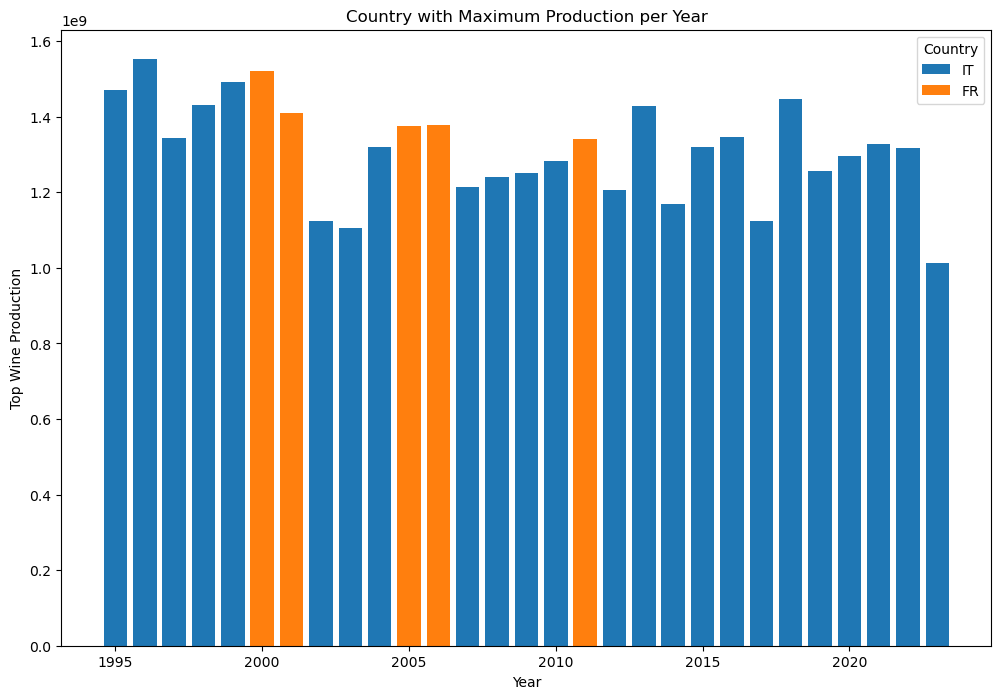

In [60]:
# 1. Which were the top wine producing countries in year X?
# 2. Which are the current top wine producing countries in year Y?

# Find the country with the maximum production per year
max_production_per_year = weather_and_wine_df.loc[weather_and_wine_df.groupby('Year')['Gallons'].idxmax()]

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the data
for country in max_production_per_year['country'].unique():
    country_data = max_production_per_year[max_production_per_year['country'] == country]
    ax.bar(country_data['Year'], country_data['Gallons'], label=country)


# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Top Wine Production')
ax.set_title('Country with Maximum Production per Year')
ax.legend(title='Country')

# Show the plot
plt.show()

Dropdown(description='Country:', index=41, options=('AF', 'AL', 'AG', 'AR', 'AM', 'AS', 'AU', 'AJ', 'BF', 'BG'…

Dropdown(description='Weather Params:', index=2, options=('TMAX', 'PRCP', 'TAVG', 'EMXT', 'EMNT'), value='TAVG…

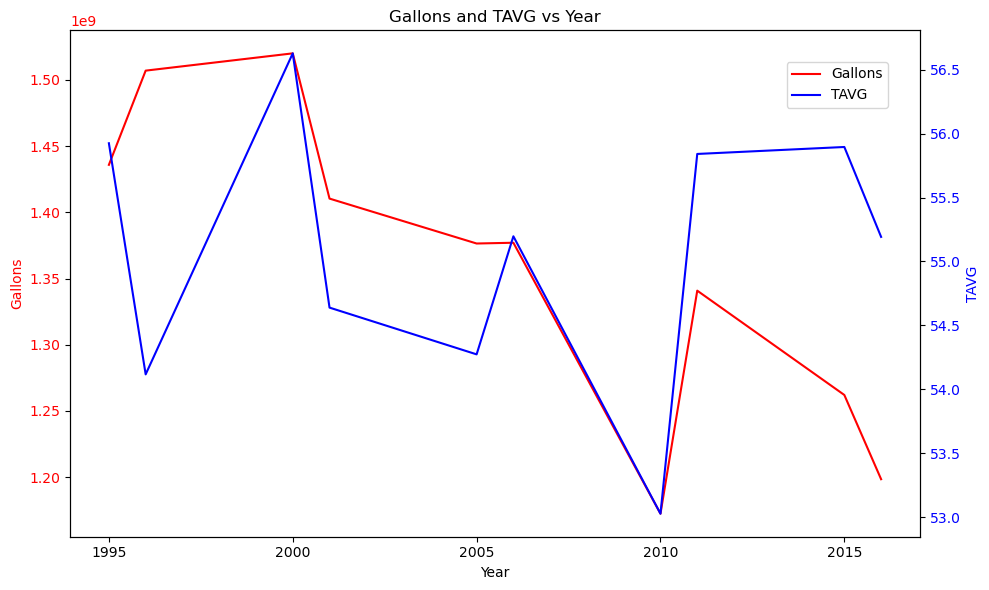

In [61]:
# Unique countries for the dropdown
countries = weather_and_wine_df['country'].unique()
weather_params = ['TMAX', 'PRCP', 'TAVG', 'EMXT', 'EMNT']

# Create a dropdown widget for country selection
country_widget = widgets.Dropdown(
    options=countries,
    description='Country:',
    value = 'FR',
    disabled=False,
)

weather_params_widget = widgets.Dropdown(
    options=weather_params,
    description='Weather Params:',
    value = 'TAVG',
    disabled=False,
)

# Function to update the plot based on the selected country
def update_plot(change):
    clear_output(wait=True)
    display(country_widget, weather_params_widget)

    country = country_widget.value
    weather_param = weather_params_widget.value

    weather_df = weather_and_wine_df[weather_and_wine_df[weather_param].notna()]
    filtered_df = weather_df[weather_df['country'] == country]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plotting Gallons vs Year on the primary y-axis
    ax1.plot(filtered_df['Year'], filtered_df['Gallons'], color='red', label='Gallons')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Gallons', color='red')
    ax1.tick_params(axis='y', labelcolor='red')

    # Create a second y-axis sharing the same x-axis
    ax2 = ax1.twinx()
    ax2.plot(filtered_df['Year'], filtered_df[weather_param], color='blue', label=weather_param)
    ax2.set_ylabel(weather_param, color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Adding titles
    plt.title(f'Gallons and {weather_param} vs Year')

    # Adding legends
    fig.tight_layout()  # Adjust layout to fit both y-axis labels
    fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
    plt.show()

# Observe changes in the dropdown and update the plot accordingly
country_widget.observe(lambda change: update_plot(change.new), names='value')
weather_params_widget.observe(update_plot, names='value')

# Display the widget
display(country_widget, weather_params_widget)

# Initial plot
update_plot(countries[0])